In [4]:
import pandas as pd
import numpy as np
from PIL import Image
import os
import matplotlib.pyplot as plt

In [5]:
from sklearn.model_selection import train_test_split

In [88]:
from keras.utils.np_utils import to_categorical
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPool2D, AveragePooling2D
from keras.optimizers import RMSprop



In [57]:
poke = pd.read_csv('pokemon.csv')

In [58]:
for i in range(len(poke['Name'])):
    for img in os.listdir('./images/images'):
        if img.split('.')[0] == poke.iloc[i]['Name']:
            poke.at[i,'Path'] = './images/images/' + img
    

In [59]:
arr=[]
for i in range(len(poke['Path'])):
    im = Image.open(poke.iloc[i]['Path'])
    rgb_im = im.convert('RGB')
    arr.append(np.asarray(rgb_im))

/usr/lib/python3/dist-packages/PIL/Image.py:931: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(


In [60]:
poke['array'] = arr

In [61]:
types = poke['Type1'].value_counts().to_dict()

In [62]:
i=0
for key in types.keys():
    types[key] = i
    i+=1

In [63]:
types

{'Water': 0,
 'Normal': 1,
 'Grass': 2,
 'Bug': 3,
 'Fire': 4,
 'Psychic': 5,
 'Rock': 6,
 'Electric': 7,
 'Poison': 8,
 'Ground': 9,
 'Fighting': 10,
 'Dark': 11,
 'Ghost': 12,
 'Dragon': 13,
 'Steel': 14,
 'Ice': 15,
 'Fairy': 16,
 'Flying': 17}

In [64]:
poke.iloc[6]['Type1']

'Water'

In [65]:
for i in range(len(poke['Type1'])):
    poke.at[i,'Type1'] = types[poke.iloc[i]['Type1']]
    

In [68]:
data = {'Array':poke['array'],'Label':poke['Type1']}
df = pd.DataFrame(data,columns=['Array','Label'])

In [172]:
X_train = []
Y_train = []
for item in df['Array']:
    X_train.append(item)
for item in df['Label']:
    Y_train.append(item)
    
X_train = np.asarray(X_train)
Y_train = np.asarray(Y_train)

In [173]:
Y_train = to_categorical(Y_train, num_classes = 18)

In [174]:
X_train, X_val, Y_train, Y_val = train_test_split(X_train, Y_train, test_size = 0.1, random_state=42)


In [176]:
X_train.shape

(728, 120, 120, 3)

In [183]:
model = Sequential()

model.add(Conv2D(filters = 32, kernel_size = (5,5),padding = 'Same', 
                 activation ='relu', input_shape = [120,120,3]))
model.add(Conv2D(filters = 32, kernel_size = (5,5),padding = 'Same', 
                 activation ='relu'))
model.add(AveragePooling2D(pool_size=(2,2)))
model.add(Dropout(0.25))


model.add(Conv2D(filters = 64, kernel_size = (3,3),padding = 'Same', 
                 activation ='relu'))
model.add(Conv2D(filters = 64, kernel_size = (3,3),padding = 'Same', 
                 activation ='relu'))
model.add(AveragePooling2D(pool_size=(2,2), strides=(2,2)))
model.add(Dropout(0.25))


model.add(Flatten())
model.add(Dense(256, activation = "relu"))
model.add(Dropout(0.5))
model.add(Dense(18,activation = "softmax"))

In [184]:
optimizer = RMSprop(lr=0.001, rho=0.9, epsilon=1e-08, decay=0.0)


In [185]:
model.compile(optimizer = optimizer , loss = "categorical_crossentropy", metrics=["accuracy"])


In [186]:
history = model.fit(X_train,Y_train, epochs = 30, validation_data = (X_val, Y_val))

Train on 728 samples, validate on 81 samples
Epoch 1/30
728/728 [==============================] - 50s 69ms/step - loss: 17.5825 - accuracy: 0.0920 - val_loss: 2.8572 - val_accuracy: 0.1358
Epoch 2/30
728/728 [==============================] - 49s 68ms/step - loss: 2.7412 - accuracy: 0.1511 - val_loss: 2.8111 - val_accuracy: 0.1481
Epoch 3/30
728/728 [==============================] - 49s 67ms/step - loss: 2.5262 - accuracy: 0.2225 - val_loss: 2.8666 - val_accuracy: 0.0988
Epoch 4/30
728/728 [==============================] - 49s 67ms/step - loss: 2.0892 - accuracy: 0.3338 - val_loss: 3.7435 - val_accuracy: 0.1358
Epoch 5/30
728/728 [==============================] - 49s 67ms/step - loss: 1.6903 - accuracy: 0.5027 - val_loss: 3.8052 - val_accuracy: 0.0988
Epoch 6/30
728/728 [==============================] - 49s 67ms/step - loss: 1.1496 - accuracy: 0.6058 - val_loss: 3.5448 - val_accuracy: 0.0617
Epoch 7/30
728/728 [==============================] - 49s 67ms/step - loss: 0.8554 - accur

In [191]:
model.save('poke_cnn')

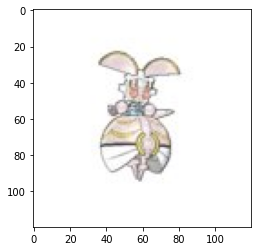

In [103]:
plt.imshow(df.iloc[800]['Array'][:,:,:])

In [227]:
char = Image.open('bulb.jpg')
char = char.resize((120,120))

In [228]:
char = np.asarray(char)

In [229]:
char = np.expand_dims(char,axis=0)

In [230]:
char.shape

(1, 120, 120, 3)

In [231]:
model.predict(char)

array([[7.1729727e-02, 1.8745476e-01, 4.9446240e-01, 5.4951239e-04,
        9.9549644e-02, 6.1578490e-02, 4.8279393e-02, 8.4143650e-04,
        8.4461865e-04, 1.4417196e-03, 1.5942470e-04, 5.8769445e-05,
        6.0507157e-03, 2.6761176e-02, 3.1931406e-05, 6.2742336e-05,
        1.4363139e-04, 6.6826646e-09]], dtype=float32)

In [221]:
types

{'Water': 0,
 'Normal': 1,
 'Grass': 2,
 'Bug': 3,
 'Fire': 4,
 'Psychic': 5,
 'Rock': 6,
 'Electric': 7,
 'Poison': 8,
 'Ground': 9,
 'Fighting': 10,
 'Dark': 11,
 'Ghost': 12,
 'Dragon': 13,
 'Steel': 14,
 'Ice': 15,
 'Fairy': 16,
 'Flying': 17}